In [1]:
#Makes Jupyter wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pybdf
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [3]:
def importBDF(filename, useCpp=False):
    """returns dataMatrix, eventTable, chanLabels"""
    if len(filename) > 0:
        rec1 = pybdf.bdfRecording(filename)

        data1 = rec1.getData(trigChan=True, useCpp=useCpp)

        #retrieve sampling rates (list of sampling rate of each channel)
        sampRate1 = rec1.sampRate
        print("**********************")
        print("The sampling rate of, ", filename, "is", sampRate1[0], "Hz")
        print()

        dur1 = rec1.duration
        #retrieve recording durations (list of recording durations of each channel)
        print("**********************")
        print("The duration of, ", filename, "is", dur1, "seconds")
        print()

        dataMatrix = data1['data']
        #time_array1 = np.arange(dataMatrix1.shape[1]) / rec1.sampRate[0]

        chanLabels = rec1.chanLabels 

        eventTable = data1['eventTable']
        
        return dataMatrix, eventTable, chanLabels
    else:
        print("--Please enter a file--")

Importing:  ./Newtest17-2048.bdf
**********************
The sampling rate of,  ./Newtest17-2048.bdf is 2048 Hz

**********************
The duration of,  ./Newtest17-2048.bdf is 60.0 seconds

Fortran Channels: 
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'Status'] 

Fortran data: 
 (16, 122880) 

Fortran events: 
 {'code': array([255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254], dtype=uint8), 'idx': array([     0,   1450,   3352,   4781,   7353,   8851,  10929,  12154,
        15046,  16141,  18324,  19772,  21909,  23332,  25105,  26336,
  

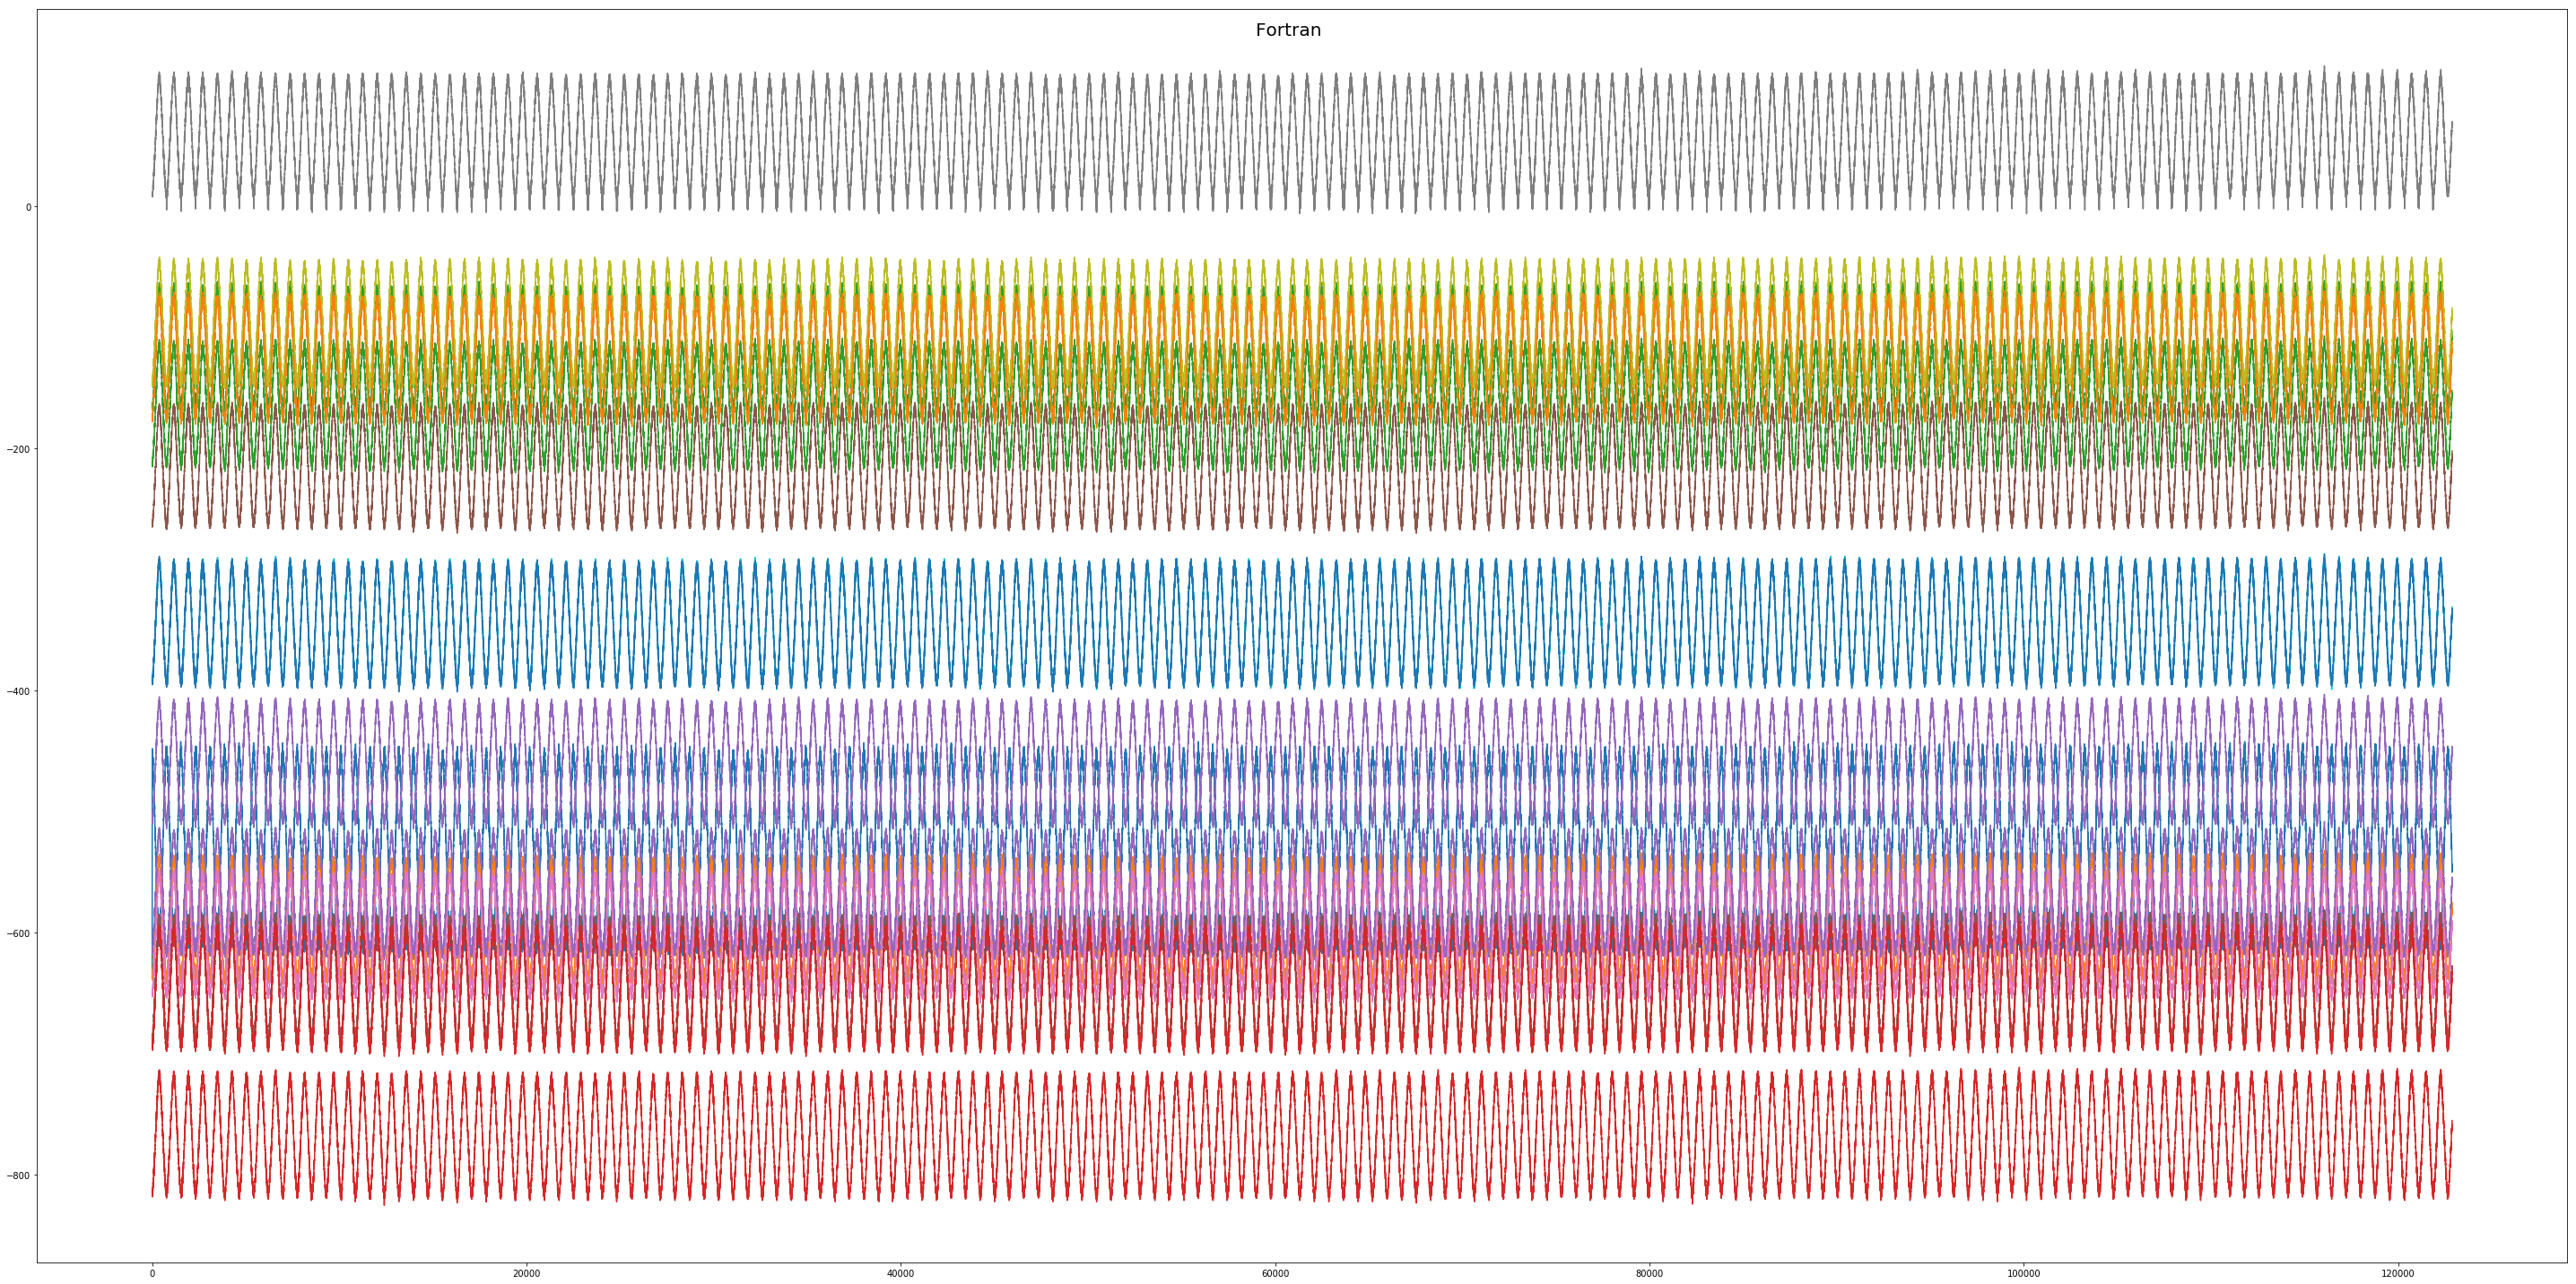

In [4]:
file = glob('./*2048*')[0]
print("Importing: ", file)

fort_data, fort_event, fort_chan = importBDF(file, useCpp=False)

print('Fortran Channels: \n', fort_chan, '\n')

print('Fortran data: \n', fort_data.shape, '\n')

print('Fortran events: \n', fort_event, '\n')

x = np.linspace(0, fort_data.shape[1] - 1, fort_data.shape[1])

plt.figure(figsize=(40,20))
for i in range(fort_data.shape[0]):
    plt.plot(x, fort_data[i,:])
plt.suptitle('Fortran', fontsize=20)
plt.tight_layout()
plt.show()
plt.close()

**********************
The sampling rate of,  ./Newtest17-2048.bdf is 2048 Hz

**********************
The duration of,  ./Newtest17-2048.bdf is 60.0 seconds

C++ Channels: 
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'Status'] 

C++ data: 
 (16, 122880) 

C++ events: 
 {'code': array([255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254], dtype=uint8), 'idx': array([     0,   1450,   3352,   4781,   7353,   8851,  10929,  12154,
        15046,  16141,  18324,  19772,  21909,  23332,  25105,  26336,
        28071,  29636,  31167,  32387,  34127, 

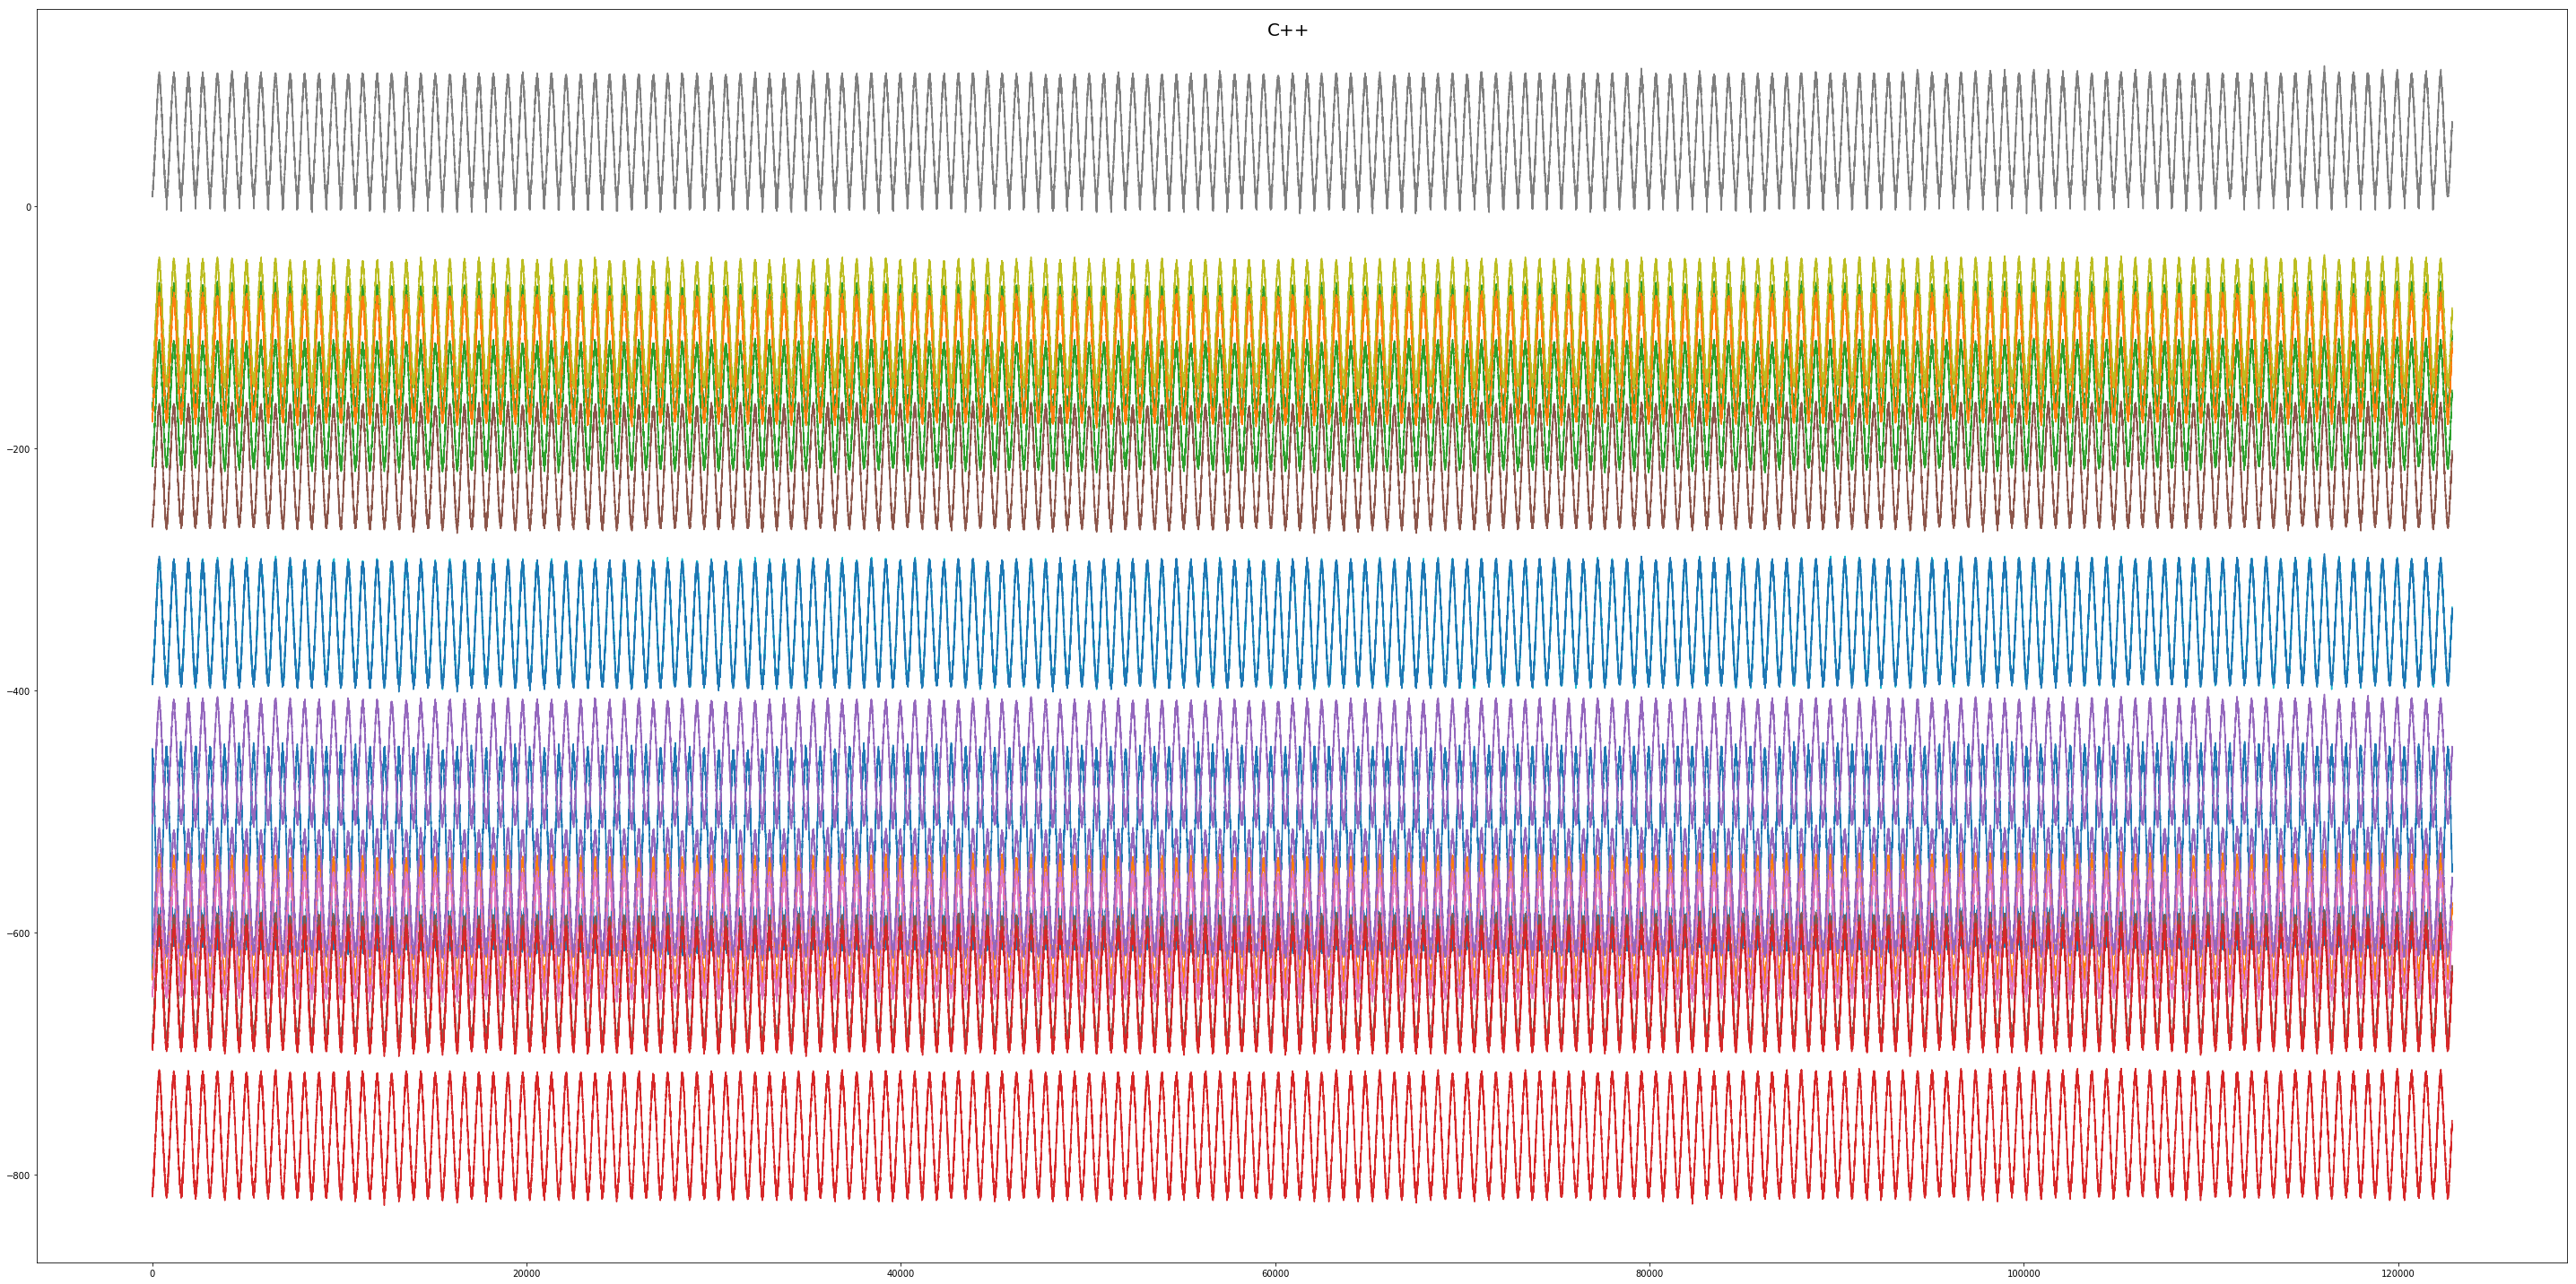

In [5]:
cpp_data, cpp_event, cpp_chan = importBDF(file, useCpp=True)

print('C++ Channels: \n', cpp_chan, '\n')

print('C++ data: \n', cpp_data.shape, '\n')

print('C++ events: \n', cpp_event, '\n')

plt.figure(figsize=(40,20))
for i in range(cpp_data.shape[0]):
    plt.plot(x, cpp_data[i,:])
plt.suptitle('C++', fontsize=20)
plt.tight_layout()
plt.show()
plt.close()